0\. 导入库

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import datasets
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns

1\. 装载数据集

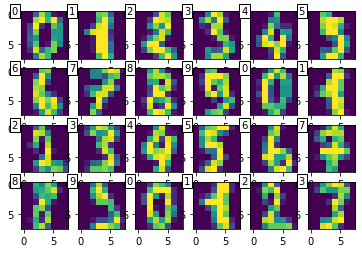

In [2]:
# load the MNIST digits dataset
mnist = datasets.load_digits()

X = npy.array(mnist.data)
Y = npy.array(mnist.target)
n = len(X)

def display(indexes, labels):
    for i in range(len(indexes))[:24]:
        plot = plt.subplot(4, 6, i + 1)
        plot.text(-2, 0, labels[i], bbox={'facecolor': 'white', 'pad': 2})
        plt.imshow(mnist.images[indexes[i]])

display(range(n), Y)

2\. 切割 train、test 数据集，比例 $7:3$ 开

In [3]:
train = npy.random.choice(n, round(0.7 * n))
test = [i for i in range(n) if i not in train]

3.1. 设定一个 $k$ 比如 $7$，训练 KNN

In [4]:
k = 7
knn = KNeighborsClassifier(7)
knn.fit(X[train], Y[train])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [5]:
def show_confusion_matrix(Y, predict):
    cm = confusion_matrix(Y, predict)
    return pds.DataFrame(cm)

def show_classification_report(Y, predict):
    cr = classification_report(Y, predict, output_dict=True)
    return pds.DataFrame(cr).transpose()
    
train_predict = knn.predict(X[train])
test_predict = knn.predict(X[test])

3.2. train 数据集上的混淆矩阵

In [6]:
show_confusion_matrix(Y[train], train_predict)

,0,1,2,3,4,5,6,7,8,9
0,116,0,0,0,0,0,0,0,0,0
1,0,130,0,0,0,0,0,0,0,0
2,0,0,127,0,0,0,0,0,0,0
3,0,0,0,93,0,1,0,2,2,1
4,0,1,0,0,141,0,0,2,0,0
5,0,0,0,0,0,118,1,0,0,1
6,0,0,0,0,0,0,137,0,0,0
7,0,0,0,0,0,0,0,137,0,0
8,0,7,0,1,0,0,0,0,107,0
9,0,1,0,1,0,0,0,0,0,131


3.3. train 数据集上的 classification_report

In [7]:
show_classification_report(Y[train], train_predict)

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,116.000000
1,0.935252,1.000000,0.966543,130.000000
2,1.000000,1.000000,1.000000,127.000000
3,0.978947,0.939394,0.958763,99.000000
4,1.000000,0.979167,0.989474,144.000000
5,0.991597,0.983333,0.987448,120.000000
6,0.992754,1.000000,0.996364,137.000000
7,0.971631,1.000000,0.985612,137.000000
8,0.981651,0.930435,0.955357,115.000000
9,0.984962,0.984962,0.984962,133.000000


3.4. test 数据集上的混淆矩阵

In [8]:
show_confusion_matrix(Y[test], test_predict)

,0,1,2,3,4,5,6,7,8,9
0,89,0,0,0,1,0,0,0,0,0
1,0,88,0,0,0,1,0,0,0,0
2,0,0,85,0,0,0,0,0,0,0
3,0,0,0,101,0,0,0,0,2,0
4,0,0,0,0,87,0,0,0,0,0
5,0,0,0,0,1,93,0,0,0,2
6,0,0,0,0,0,0,85,0,0,0
7,0,0,0,0,0,0,0,90,0,0
8,0,7,1,0,0,0,0,1,78,0
9,0,0,0,0,1,2,0,0,0,86


3.5. test 数据集上的 classification_report

In [9]:
show_classification_report(Y[test], test_predict)

,precision,recall,f1-score,support
0,1.000000,0.988889,0.994413,90.000000
1,0.926316,0.988764,0.956522,89.000000
2,0.988372,1.000000,0.994152,85.000000
3,1.000000,0.980583,0.990196,103.000000
4,0.966667,1.000000,0.983051,87.000000
5,0.968750,0.968750,0.968750,96.000000
6,1.000000,1.000000,1.000000,85.000000
7,0.989011,1.000000,0.994475,90.000000
8,0.975000,0.896552,0.934132,87.000000
9,0.977273,0.966292,0.971751,89.000000


3.6. test 数据集上的错误举例

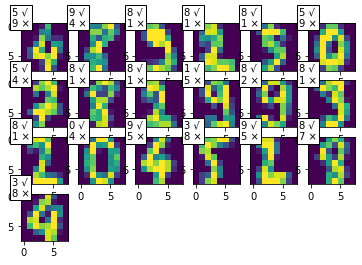

In [10]:
errors = [i for i in range(len(test)) if test_predict[i] != Y[test[i]]]
display(errors, ["%d √\n%d ×" % (Y[test[i]], test_predict[i]) for i in errors])

4\. 从 $3\sim20$ 设定 $k$，计算 KNN 在 test 集上的误差

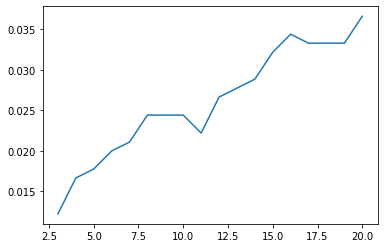

In [11]:
ks = npy.array(range(3, 20 + 1))
accuracy = 1 - npy.array([accuracy_score(Y[test], KNeighborsClassifier(k).fit(X[train], Y[train]).predict(X[test])) for k in ks])
plt.plot(ks, accuracy)